In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load and clean data

### Create Meta dataframe for patient - sample - RACE - OS.status - OS.time - ...

In [113]:
survival_df = pd.read_csv("../data/xena/TCGA-OV.survival.tsv", sep = '\t', header = 0, names=['SAMPLE_ID', 'OS', 'PATIENT_ID', 'OS.time'])
print(survival_df.shape)
survival_df.head()

(731, 4)


,SAMPLE_ID,OS,PATIENT_ID,OS.time
0,TCGA-30-1857-01A,1,TCGA-30-1857,8
1,TCGA-23-1107-01A,1,TCGA-23-1107,9
2,TCGA-25-1631-01A,1,TCGA-25-1631,9
3,TCGA-24-2262-01A,1,TCGA-24-2262,11
4,TCGA-24-2262-11A,1,TCGA-24-2262,11


In [114]:
patient_raw_df = pd.read_csv("../data/cbioportal/data_clinical_patient.txt", sep='\t', header=0, skiprows=4)
patient_raw_df.head(3)

,PATIENT_ID,SUBTYPE,CANCER_TYPE_ACRONYM,OTHER_PATIENT_ID,AGE,SEX,AJCC_PATHOLOGIC_TUMOR_STAGE,AJCC_STAGING_EDITION,DAYS_LAST_FOLLOWUP,DAYS_TO_BIRTH,...,IN_PANCANPATHWAYS_FREEZE,OS_STATUS,OS_MONTHS,DSS_STATUS,DSS_MONTHS,DFS_STATUS,DFS_MONTHS,PFS_STATUS,PFS_MONTHS,GENETIC_ANCESTRY_LABEL
0,TCGA-04-1331,NaN,OV,6d10d4ee-6331-4bba-93bc-a7b64cc0b22a,78.0,Female,NaN,NaN,1224.0,-28848.0,...,No,1:DECEASED,43.922806,1:DEAD WITH TUMOR,43.922806,1:Recurred/Progressed,15.090246,1:PROGRESSION,15.090246,EUR
1,TCGA-04-1332,NaN,OV,b46263ab-c3ca-4fda-a895-74c7e6e6fe22,70.0,Female,NaN,NaN,1247.0,-25786.0,...,No,1:DECEASED,40.996811,1:DEAD WITH TUMOR,40.996811,NaN,NaN,1:PROGRESSION,12.920406,EUR
2,TCGA-04-1335,NaN,OV,ab3dbbbe-eed6-4a35-a505-1815225e86c9,60.0,Female,NaN,NaN,55.0,-21963.0,...,No,1:DECEASED,1.808199,1:DEAD WITH TUMOR,1.808199,NaN,NaN,1:PROGRESSION,1.808199,AFR


In [115]:
list(patient_raw_df.columns)[0:10]

['PATIENT_ID',
 'SUBTYPE',
 'CANCER_TYPE_ACRONYM',
 'OTHER_PATIENT_ID',
 'AGE',
 'SEX',
 'AJCC_PATHOLOGIC_TUMOR_STAGE',
 'AJCC_STAGING_EDITION',
 'DAYS_LAST_FOLLOWUP',
 'DAYS_TO_BIRTH']

In [116]:
patient_df = patient_raw_df[['PATIENT_ID', 'AGE', 'ETHNICITY', 'RACE', 'OS_STATUS', 'OS_MONTHS']].copy()
patient_df.head()

,PATIENT_ID,AGE,ETHNICITY,RACE,OS_STATUS,OS_MONTHS
0,TCGA-04-1331,78.0,Not Hispanic Or Latino,White,1:DECEASED,43.922806
1,TCGA-04-1332,70.0,Not Hispanic Or Latino,White,1:DECEASED,40.996811
2,TCGA-04-1335,60.0,Not Hispanic Or Latino,Black or African American,1:DECEASED,1.808199
3,TCGA-04-1336,55.0,NaN,White,0:LIVING,49.150146
4,TCGA-04-1337,78.0,Not Hispanic Or Latino,White,1:DECEASED,2.005457


In [117]:
sample_raw_df = pd.read_table("../data/cbioportal/data_clinical_sample.txt", sep='\t', header=0, skiprows=4)
sample_raw_df.head(3)

,PATIENT_ID,SAMPLE_ID,ONCOTREE_CODE,CANCER_TYPE,CANCER_TYPE_DETAILED,TUMOR_TYPE,GRADE,TISSUE_PROSPECTIVE_COLLECTION_INDICATOR,TISSUE_RETROSPECTIVE_COLLECTION_INDICATOR,TISSUE_SOURCE_SITE_CODE,TUMOR_TISSUE_SITE,ANEUPLOIDY_SCORE,SAMPLE_TYPE,MSI_SCORE_MANTIS,MSI_SENSOR_SCORE,SOMATIC_STATUS,TMB_NONSYNONYMOUS,TISSUE_SOURCE_SITE
0,TCGA-04-1331,TCGA-04-1331-01,SOC,Ovarian Epithelial Tumor,Serous Ovarian Cancer,Serous Cystadenocarcinoma,G3,NaN,NaN,4,Ovary,7.0,Primary,0.2781,0.75,Matched,4.5,Gynecologic Oncology Group
1,TCGA-04-1332,TCGA-04-1332-01,SOC,Ovarian Epithelial Tumor,Serous Ovarian Cancer,Serous Cystadenocarcinoma,G3,NaN,NaN,4,Ovary,15.0,Primary,0.3002,0.18,Matched,NaN,Gynecologic Oncology Group
2,TCGA-04-1335,TCGA-04-1335-01,SOC,Ovarian Epithelial Tumor,Serous Ovarian Cancer,Serous Cystadenocarcinoma,G2,NaN,NaN,4,Ovary,6.0,Primary,NaN,14.65,Matched,0.5,Gynecologic Oncology Group


In [118]:
print(list(sample_raw_df.columns))
sample_df = sample_raw_df[['PATIENT_ID', 'SAMPLE_ID', 'GRADE']].copy()
sample_df.head(3)

['PATIENT_ID', 'SAMPLE_ID', 'ONCOTREE_CODE', 'CANCER_TYPE', 'CANCER_TYPE_DETAILED', 'TUMOR_TYPE', 'GRADE', 'TISSUE_PROSPECTIVE_COLLECTION_INDICATOR', 'TISSUE_RETROSPECTIVE_COLLECTION_INDICATOR', 'TISSUE_SOURCE_SITE_CODE', 'TUMOR_TISSUE_SITE', 'ANEUPLOIDY_SCORE', 'SAMPLE_TYPE', 'MSI_SCORE_MANTIS', 'MSI_SENSOR_SCORE', 'SOMATIC_STATUS', 'TMB_NONSYNONYMOUS', 'TISSUE_SOURCE_SITE']


,PATIENT_ID,SAMPLE_ID,GRADE
0,TCGA-04-1331,TCGA-04-1331-01,G3
1,TCGA-04-1332,TCGA-04-1332-01,G3
2,TCGA-04-1335,TCGA-04-1335-01,G2


In [119]:
tmp_df = pd.merge(patient_df, sample_df, on='PATIENT_ID')
meta_df = pd.merge(tmp_df, survival_df, on='PATIENT_ID')
meta_df.head()

,PATIENT_ID,AGE,ETHNICITY,RACE,OS_STATUS,OS_MONTHS,SAMPLE_ID_x,GRADE,SAMPLE_ID_y,OS,OS.time
0,TCGA-04-1331,78.0,Not Hispanic Or Latino,White,1:DECEASED,43.922806,TCGA-04-1331-01,G3,TCGA-04-1331-01A,1,1336
1,TCGA-04-1332,70.0,Not Hispanic Or Latino,White,1:DECEASED,40.996811,TCGA-04-1332-01,G3,TCGA-04-1332-01A,1,1247
2,TCGA-04-1335,60.0,Not Hispanic Or Latino,Black or African American,1:DECEASED,1.808199,TCGA-04-1335-01,G2,TCGA-04-1335-11A,1,55
3,TCGA-04-1335,60.0,Not Hispanic Or Latino,Black or African American,1:DECEASED,1.808199,TCGA-04-1335-01,G2,TCGA-04-1335-01A,1,55
4,TCGA-04-1336,55.0,NaN,White,0:LIVING,49.150146,TCGA-04-1336-01,G3,TCGA-04-1336-11A,0,1495


In [120]:
meta_df['RACE_MOD'] = meta_df['RACE'].apply(lambda x:'White' if x=='White' else "Other")
meta_df['target'] = meta_df['OS_MONTHS'].apply(lambda x:1 if x >= 60 else 0)
meta_df = meta_df.drop(columns=['ETHNICITY', 'RACE'])
meta_df.head()

,PATIENT_ID,AGE,OS_STATUS,OS_MONTHS,SAMPLE_ID_x,GRADE,SAMPLE_ID_y,OS,OS.time,RACE_MOD,target
0,TCGA-04-1331,78.0,1:DECEASED,43.922806,TCGA-04-1331-01,G3,TCGA-04-1331-01A,1,1336,White,0
1,TCGA-04-1332,70.0,1:DECEASED,40.996811,TCGA-04-1332-01,G3,TCGA-04-1332-01A,1,1247,White,0
2,TCGA-04-1335,60.0,1:DECEASED,1.808199,TCGA-04-1335-01,G2,TCGA-04-1335-11A,1,55,Other,0
3,TCGA-04-1335,60.0,1:DECEASED,1.808199,TCGA-04-1335-01,G2,TCGA-04-1335-01A,1,55,Other,0
4,TCGA-04-1336,55.0,0:LIVING,49.150146,TCGA-04-1336-01,G3,TCGA-04-1336-11A,0,1495,White,0


In [121]:
# drop NA
meta_df = meta_df.dropna(axis=0)

# drop duplicates
meta_df = meta_df.drop_duplicates(subset='PATIENT_ID', keep='first')
meta_df.shape # 477 rows

(477, 11)

In [122]:
print(meta_df.shape) # (715, 11)
print(meta_df.info())

(477, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 477 entries, 0 to 605
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PATIENT_ID   477 non-null    object 
 1   AGE          477 non-null    float64
 2   OS_STATUS    477 non-null    object 
 3   OS_MONTHS    477 non-null    float64
 4   SAMPLE_ID_x  477 non-null    object 
 5   GRADE        477 non-null    object 
 6   SAMPLE_ID_y  477 non-null    object 
 7   OS           477 non-null    int64  
 8   OS.time      477 non-null    int64  
 9   RACE_MOD     477 non-null    object 
 10  target       477 non-null    int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 44.7+ KB
None


In [123]:
meta_df['target'].value_counts() # 477 rows with 390 individual over 60 months 

0    390
1     87
Name: target, dtype: int64

array([[<Axes: title={'center': 'AGE'}>,
        <Axes: title={'center': 'OS_MONTHS'}>],
       [<Axes: title={'center': 'OS'}>,
        <Axes: title={'center': 'OS.time'}>],
       [<Axes: title={'center': 'target'}>, <Axes: >]], dtype=object)

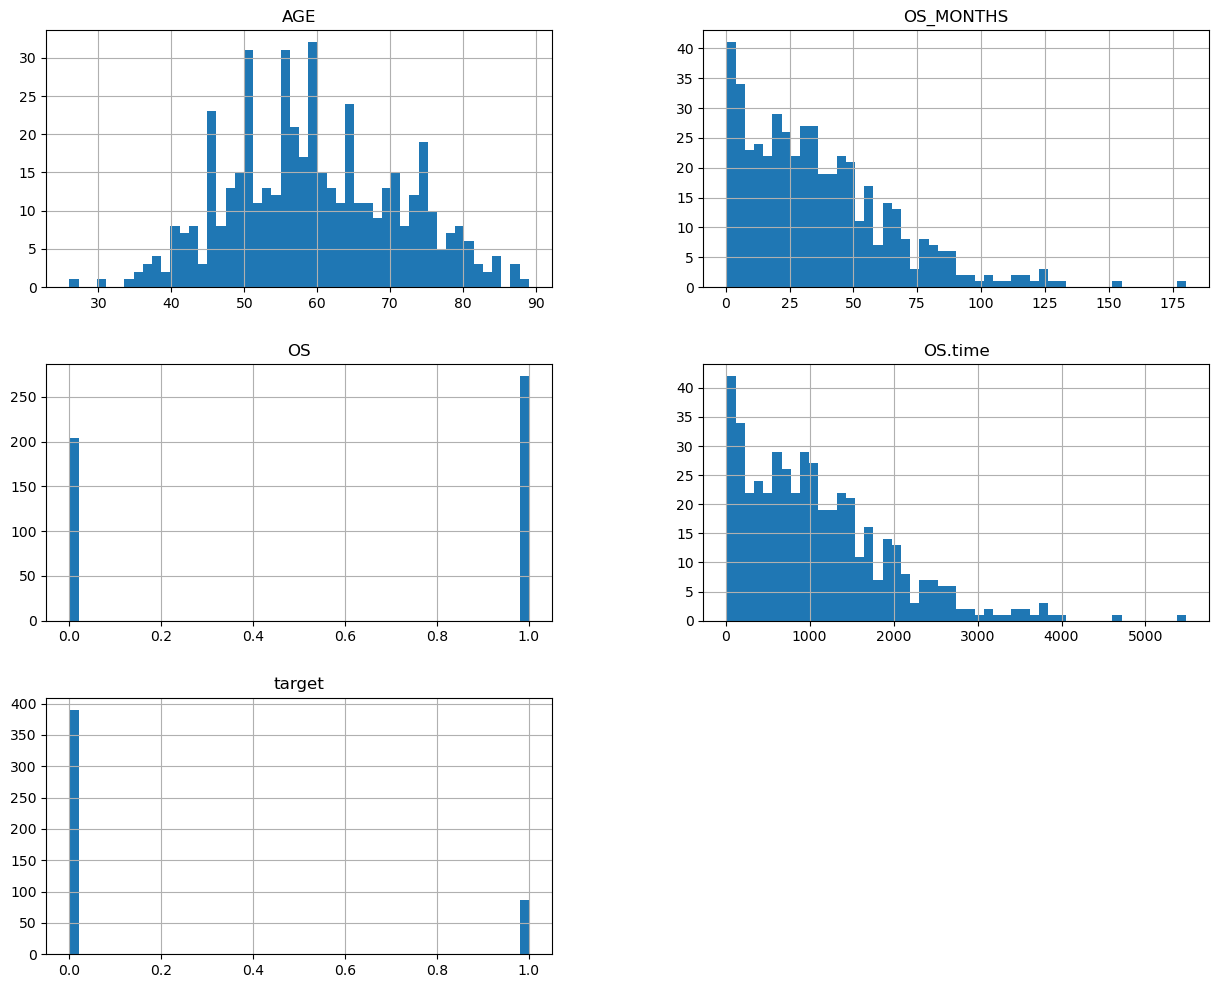

In [74]:
meta_df.hist(bins=50, figsize=(15,12))

### Add phenotype information

Read `data_mutations.txt` downloaded from cBioportal

In [36]:
mutation_raw_df = pd.read_table('../data/cbioportal/data_mutations.txt', sep='\t', header=0)
mutation_raw_df.head()

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Classification,...,SYMBOL_SOURCE,TREMBL,TSL,UNIPARC,VARIANT_CLASS,all_effects,cDNA_position,n_depth,t_depth,Annotation_Status
0,CHUK,1147.0,.,GRCh37,10,101961901,101961901,+,frameshift_variant,Frame_Shift_Del,...,HGNC,.,.,UPI000013D6C7,deletion,"CHUK,frameshift_variant,p.Glu505LysfsTer4,ENST...",1600,153,162,SUCCESS
1,LZTS2,84445.0,.,GRCh37,10,102763427,102763427,+,missense_variant,Missense_Mutation,...,HGNC,"S4R3W7_HUMAN,Q9BRY6_HUMAN,B1AL13_HUMAN,B1AL12_...",.,UPI00001BD944,SNV,"LZTS2,missense_variant,p.Ser191Cys,ENST0000037...",3635,78,90,SUCCESS
2,BAG3,9531.0,.,GRCh37,10,121429597,121429597,+,missense_variant,Missense_Mutation,...,HGNC,.,.,UPI0000000C7A,SNV,"BAG3,missense_variant,p.Arg81Trp,ENST000004501...",721,105,143,SUCCESS
3,TACC2,10579.0,.,GRCh37,10,123987513,123987513,+,missense_variant,Missense_Mutation,...,HGNC,.,.,UPI0000246F6B,SNV,"TACC2,missense_variant,p.Ala719Val,ENST0000036...",8226,165,245,SUCCESS
4,MKX,283078.0,.,GRCh37,10,28023684,28023684,+,missense_variant,Missense_Mutation,...,HGNC,H0YMU2_HUMAN,.,UPI0000161911,SNV,"MKX,missense_variant,p.Gly180Val,ENST000003757...",972,101,107,SUCCESS


In [110]:
mutation_raw_df['Hugo_Symbol'].value_counts().shape # 15444 genes
top50_mutation_genelist = list(mutation_raw_df['Hugo_Symbol'].value_counts().head(50).index)
top50_mutation_genelist[0]

'TP53'

In [46]:
mutation_raw_df[['Tumor_Sample_Barcode']]

,Tumor_Sample_Barcode,Matched_Norm_Sample_Barcode
0,TCGA-04-1331-01,TCGA-04-1331-10
1,TCGA-04-1331-01,TCGA-04-1331-10
2,TCGA-04-1331-01,TCGA-04-1331-10
3,TCGA-04-1331-01,TCGA-04-1331-10
4,TCGA-04-1331-01,TCGA-04-1331-10
...,...,...
53199,TCGA-13-0889-01,TCGA-13-0889-10
53200,TCGA-13-0889-01,TCGA-13-0889-10
53201,TCGA-13-0889-01,TCGA-13-0889-10
53202,TCGA-13-0889-01,TCGA-13-0889-10


In [78]:
sample_mutation_num_df = mutation_raw_df.groupby('Tumor_Sample_Barcode').agg(mutation_num=('Hugo_Symbol', lambda x: x[x != ""].count())).reset_index()
sample_mutation_num_df.head()

,Tumor_Sample_Barcode,mutation_num
0,TCGA-04-1331-01,193
1,TCGA-04-1335-01,29
2,TCGA-04-1336-01,89
3,TCGA-04-1341-01,42
4,TCGA-04-1342-01,274


In [100]:
result = (mutation_raw_df.groupby(['Tumor_Sample_Barcode', 'Hugo_Symbol'])
          .size()
          .reset_index(name='mutation_count'))

result = result[result['Hugo_Symbol'].isin(top50_mutation_genelist)]
result.head() # 1928 rows

,Tumor_Sample_Barcode,Hugo_Symbol,mutation_count
5,TCGA-04-1331-01,AHNAK2,1
47,TCGA-04-1331-01,DNAH9,1
69,TCGA-04-1331-01,FLG2,1
93,TCGA-04-1331-01,LRP2,2
113,TCGA-04-1331-01,NEB,1


In [105]:
mutation_df = pd.merge(sample_mutation_num_df, result, on='Tumor_Sample_Barcode')

In [109]:
wide_df = mutation_df.pivot_table(index='Tumor_Sample_Barcode', 
                                  columns='Hugo_Symbol', 
                                  values='mutation_count',
                                  fill_value=0).reset_index()
wide_df = pd.merge(wide_df, mutation_df[['Tumor_Sample_Barcode', 'mutation_num']].drop_duplicates(), 
                   on='Tumor_Sample_Barcode', 
                   how='left')
wide_df.head()

,Tumor_Sample_Barcode,AHNAK,AHNAK2,APOB,COL6A3,CSMD1,CSMD2,CSMD3,DMD,DNAH3,...,TENM1,TG,TP53,TTN,UBR4,USH2A,VPS13B,XIST,ZNF665,mutation_num
0,TCGA-04-1331-01,0,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,193
1,TCGA-04-1335-01,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,3,0,29
2,TCGA-04-1336-01,0,2,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,89
3,TCGA-04-1341-01,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,42
4,TCGA-04-1342-01,1,2,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,274


### Merge meta with phenotype

In [126]:
meta_pheno_df = pd.merge(meta_df, wide_df, left_on='SAMPLE_ID_x', right_on='Tumor_Sample_Barcode', how='inner')
meta_pheno_df.head() # 334 patients, 276 last shorter than 60 months, 58 last longer than 60 months

,PATIENT_ID,AGE,OS_STATUS,OS_MONTHS,SAMPLE_ID_x,GRADE,SAMPLE_ID_y,OS,OS.time,RACE_MOD,...,TENM1,TG,TP53,TTN,UBR4,USH2A,VPS13B,XIST,ZNF665,mutation_num
0,TCGA-04-1331,78.0,1:DECEASED,43.922806,TCGA-04-1331-01,G3,TCGA-04-1331-01A,1,1336,White,...,0,0,1,1,0,0,0,0,0,193
1,TCGA-04-1335,60.0,1:DECEASED,1.808199,TCGA-04-1335-01,G2,TCGA-04-1335-11A,1,55,Other,...,0,0,1,1,0,0,0,3,0,29
2,TCGA-04-1336,55.0,0:LIVING,49.150146,TCGA-04-1336-01,G3,TCGA-04-1336-11A,0,1495,White,...,0,0,1,0,0,0,0,0,0,89
3,TCGA-04-1341,85.0,0:LIVING,1.084920,TCGA-04-1341-01,G3,TCGA-04-1341-01A,0,33,White,...,0,0,1,0,0,0,0,0,0,42
4,TCGA-04-1342,80.0,1:DECEASED,18.509386,TCGA-04-1342-01,G2,TCGA-04-1342-11A,1,563,White,...,0,0,0,0,0,0,0,0,0,274


In [130]:
meta_pheno_df['target'].value_counts()

0    276
1     58
Name: target, dtype: int64

### RNA data

In [156]:
methyl_raw_df = pd.read_table("../data/xena/TCGA-OV.methylation27.tsv", sep='\t', header=0)
methyl_raw_df = methyl_raw_df.dropna(axis=0)
methyl_raw_df.head()  # 60483 genes x 614 samples

,Composite Element REF,TCGA-09-2051-01A,TCGA-29-1695-01A,TCGA-24-1556-01A,TCGA-61-2003-01A,TCGA-25-1631-01A,TCGA-29-2429-01A,TCGA-20-1684-01A,TCGA-42-2587-01A,TCGA-13-1404-01A,...,TCGA-61-2012-01A,TCGA-29-1702-01A,TCGA-29-2436-01A,TCGA-13-1510-01A,TCGA-23-2078-01A,TCGA-09-1666-01A,TCGA-29-1777-01A,TCGA-61-2110-01A,TCGA-25-2042-01A,TCGA-13-1819-02A
0,cg00000292,0.882211,0.609526,0.932333,0.778579,0.868855,0.291885,0.636406,0.704529,0.881873,...,0.931085,0.826589,0.837650,0.930909,0.860731,0.837333,0.770512,0.906607,0.754542,0.773391
2,cg00003994,0.028172,0.036308,0.028017,0.022277,0.020664,0.024336,0.039094,0.028444,0.030817,...,0.026244,0.090939,0.018101,0.040179,0.190886,0.131369,0.031158,0.042393,0.038078,0.028413
3,cg00005847,0.809044,0.821375,0.151088,0.858141,0.839313,0.343691,0.941382,0.667006,0.877618,...,0.636708,0.512856,0.713105,0.780428,0.232962,0.105464,0.775153,0.360970,0.611481,0.178023
6,cg00008493,0.991214,0.852059,0.986907,0.984246,0.988178,0.987470,0.985646,0.984761,0.995566,...,0.989450,0.989213,0.990160,0.976978,0.990730,0.989616,0.984000,0.989902,0.987766,0.989842
7,cg00008713,0.011510,0.013135,0.012577,0.011383,0.008534,0.010211,0.012530,0.013867,0.009010,...,0.009481,0.013748,0.010427,0.015096,0.007829,0.011365,0.010291,0.009227,0.010533,0.010504


In [204]:
numeric_df = methyl_raw_df.select_dtypes(include=['number'])
variances = numeric_df.var(axis=1)
n = 50
top50_methyl_genes = variances.nlargest(n).index
top_genes_df  = methyl_raw_df.loc[top50_methyl_genes]
top_genes_df.shape # (50, 614)
top_genes_df.head()

,Composite Element REF,TCGA-09-2051-01A,TCGA-29-1695-01A,TCGA-24-1556-01A,TCGA-61-2003-01A,TCGA-25-1631-01A,TCGA-29-2429-01A,TCGA-20-1684-01A,TCGA-42-2587-01A,TCGA-13-1404-01A,...,TCGA-61-2012-01A,TCGA-29-1702-01A,TCGA-29-2436-01A,TCGA-13-1510-01A,TCGA-23-2078-01A,TCGA-09-1666-01A,TCGA-29-1777-01A,TCGA-61-2110-01A,TCGA-25-2042-01A,TCGA-13-1819-02A
959,cg00929855,0.024629,0.921525,0.568146,0.016968,0.012116,0.758424,0.119938,0.580619,0.009914,...,0.007209,0.978726,0.084067,0.014758,0.021113,0.016168,0.007612,0.005328,0.108435,0.023561
4854,cg04797323,0.176486,0.757200,0.040084,0.061580,0.941084,0.028398,0.755186,0.121229,0.012155,...,0.930293,0.072095,0.659126,0.952684,0.043714,0.875139,0.186165,0.951896,0.033745,0.027995
6823,cg06825142,0.550259,0.541125,0.551169,0.663043,0.732105,0.051381,0.011717,0.025745,0.006590,...,0.807633,0.814094,0.549573,0.838211,0.015961,0.914827,0.147107,0.760426,0.050063,0.093167
14128,cg14159672,0.341658,0.015235,0.954323,0.306260,0.952965,0.341313,0.957044,0.942163,0.960145,...,0.774353,0.913781,0.094795,0.872218,0.377907,0.037492,0.976257,0.016329,0.396981,0.053680
25435,cg25438963,0.912363,0.175345,0.034153,0.036251,0.043123,0.066875,0.922960,0.041362,0.966653,...,0.777913,0.029246,0.049494,0.049465,0.758053,0.740864,0.120142,0.025611,0.020925,0.033698


In [205]:
top_genes_df = top_genes_df.reset_index()
top_genes_df = top_genes_df.drop(columns = 'index')
top_genes_df = top_genes_df.transpose()
top_genes_df.columns = top_genes_df.iloc[0]
top_genes_df = top_genes_df.drop(top_genes_df.index[0])
top_genes_df = top_genes_df.reset_index().rename(columns={
    'index': 'SAMPLE_ID'
})
top_genes_df.columns.name = None
top_genes_df.head(5)

,SAMPLE_ID,cg00929855,cg04797323,cg06825142,cg14159672,cg25438963,cg17965019,cg06958829,cg01683883,cg22881914,...,cg17356733,cg27090216,cg13035743,cg03958979,cg09971811,cg00202711,cg09037813,cg12880658,cg05488632,cg26521404
0,TCGA-09-2051-01A,0.024629,0.176486,0.550259,0.341658,0.912363,0.832232,0.892068,0.047899,0.687097,...,0.836276,0.488388,0.827965,0.199607,0.662514,0.048067,0.526405,0.281707,0.719732,0.690672
1,TCGA-29-1695-01A,0.921525,0.7572,0.541125,0.015235,0.175345,0.391088,0.030842,0.077468,0.851399,...,0.071138,0.012009,0.049936,0.848736,0.081085,0.564274,0.111915,0.760354,0.4555,0.868086
2,TCGA-24-1556-01A,0.568146,0.040084,0.551169,0.954323,0.034153,0.023057,0.066432,0.622952,0.524064,...,0.912671,0.007345,0.615733,0.877622,0.578177,0.414573,0.954121,0.00924,0.212859,0.776855
3,TCGA-61-2003-01A,0.016968,0.06158,0.663043,0.30626,0.036251,0.030799,0.059733,0.023413,0.011135,...,0.331152,0.015432,0.917016,0.106936,0.359032,0.105623,0.335211,0.722874,0.735846,0.761859
4,TCGA-25-1631-01A,0.012116,0.941084,0.732105,0.952965,0.043123,0.021367,0.556143,0.647159,0.432837,...,0.892807,0.557539,0.191753,0.596317,0.399869,0.622138,0.8598,0.749693,0.832016,0.881824


In [216]:
top50_methyl_gene = list(top_genes_df.columns)[1:]

### Merge meta_pheno with methy information

In [226]:
meta_pheno_methyl_df = pd.merge(meta_pheno_df, top_genes_df, left_on='SAMPLE_ID_y', right_on='SAMPLE_ID', how='inner')
meta_pheno_methyl_df.head(5)

,PATIENT_ID,AGE,OS_STATUS,OS_MONTHS,SAMPLE_ID_x,GRADE,SAMPLE_ID_y,OS,OS.time,RACE_MOD,...,cg17356733,cg27090216,cg13035743,cg03958979,cg09971811,cg00202711,cg09037813,cg12880658,cg05488632,cg26521404
0,TCGA-04-1331,78.0,1:DECEASED,43.922806,TCGA-04-1331-01,G3,TCGA-04-1331-01A,1,1336,White,...,0.928138,0.101867,0.92243,0.07143,0.950468,0.350175,0.957258,0.863958,0.860237,0.889689
1,TCGA-04-1341,85.0,0:LIVING,1.084920,TCGA-04-1341-01,G3,TCGA-04-1341-01A,0,33,White,...,0.3872,0.141363,0.600896,0.461968,0.071153,0.090675,0.964641,0.643738,0.847881,0.743712
2,TCGA-04-1343,72.0,1:DECEASED,11.868363,TCGA-04-1343-01,G3,TCGA-04-1343-01A,1,361,White,...,0.175102,0.030018,0.12357,0.868473,0.278896,0.632114,0.418019,0.783895,0.102447,0.813615
3,TCGA-04-1362,59.0,1:DECEASED,44.317323,TCGA-04-1362-01,G3,TCGA-04-1362-01A,1,1348,White,...,0.056698,0.575896,0.042972,0.556571,0.314332,0.921168,0.698666,0.009076,0.024416,0.94715
4,TCGA-04-1367,50.0,0:LIVING,103.396127,TCGA-04-1367-01,G3,TCGA-04-1367-01A,0,3145,White,...,0.910995,0.007035,0.06067,0.761619,0.987967,0.886614,0.476944,0.3363,0.807751,0.915447


In [256]:
meta_pheno_methyl_df['target'] = meta_pheno_methyl_df['OS_MONTHS'].apply(lambda x:1 if x >= 48 else 0)
meta_pheno_methyl_df.target.value_counts()

0    210
1     72
Name: target, dtype: int64

## Goal 0: Exploratory Data Analysis

### Version 1: Age, number of mutation on top 50 mutated genes, total number of mutation genes

In [257]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# numerical data columns
numerical_features = ['AGE'] + top50_mutation_genelist + ['mutation_num']
X = meta_pheno_df[numerical_features]

# normalization
X_scaled = StandardScaler().fit_transform(X)

# PCA 
pca = PCA(n_components=2)  # Choose the first 2 components
principalComponents = pca.fit_transform(X_scaled)

# PCA result to dataframe
PCA_df = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
PCA_df['target'] = meta_pheno_df['target']

In [ ]:
PCA_df.head()

In [260]:
pca.explained_variance_ratio_ 
# array([0.14761139, 0.04221068])
# 14% variance is on first componenet, 4% variance is on the second componenet

array([0.14761139, 0.04221068])

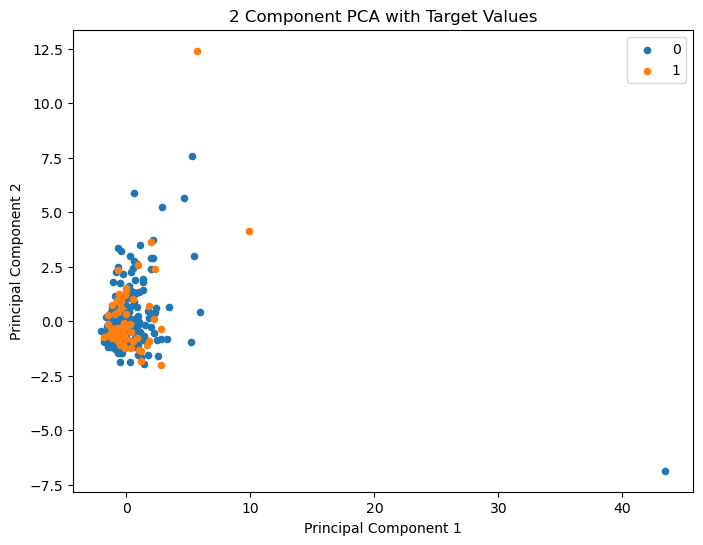

In [261]:
fig, ax = plt.subplots(figsize=(8, 6))
for target_value, group in PCA_df.groupby('target'):
    ax.scatter(group['PC1'], group['PC2'], label=target_value, s=20)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2 Component PCA with Target Values')
ax.legend()

plt.show()

### Version 2: Add Methylation Data (Included 50 genes having the largest variance in methylation level)

In [262]:
# numerical data columns
numerical_features = ['AGE'] + top50_mutation_genelist + ['mutation_num'] + top50_methyl_gene
X = meta_pheno_methyl_df[numerical_features]

# normalization
X_scaled = StandardScaler().fit_transform(X)

# PCA 
pca = PCA(n_components=2)  # Choose the first 2 components
principalComponents = pca.fit_transform(X_scaled)

# PCA result to dataframe
PCA_df = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
PCA_df['target'] = meta_pheno_methyl_df['target']
pca.explained_variance_ratio_ 
# array([0.14761139, 0.04221068])
# 14% variance is on first componenet, 4% variance is on the second componenet

array([0.08736149, 0.06357474])

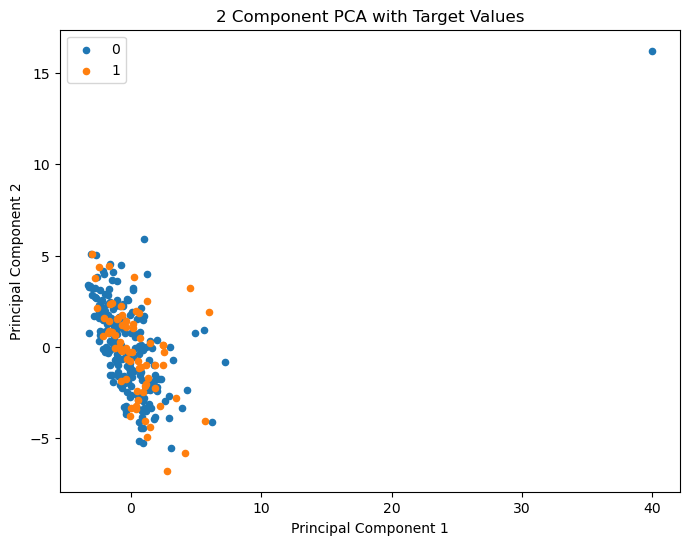

In [263]:
fig, ax = plt.subplots(figsize=(8, 6))
for target_value, group in PCA_df.groupby('target'):
    ax.scatter(group['PC1'], group['PC2'], label=target_value, s=20)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2 Component PCA with Target Values')
ax.legend()

plt.show()

### Version 3: Categorical data to dummy variables (GRADE, OS, RACE_MOD)

In [264]:
meta_pheno_methyl_df['GRADE'].value_counts()

G3    237
G2     39
GX      4
G1      2
Name: GRADE, dtype: int64

In [265]:
meta_pheno_methy_dummy = pd.get_dummies(meta_pheno_methyl_df, columns=['GRADE', 'OS', 'RACE_MOD'], drop_first=True)
meta_pheno_methy_dummy.head()

,PATIENT_ID,AGE,OS_STATUS,OS_MONTHS,SAMPLE_ID_x,SAMPLE_ID_y,OS.time,target,Tumor_Sample_Barcode,AHNAK,...,cg00202711,cg09037813,cg12880658,cg05488632,cg26521404,GRADE_G2,GRADE_G3,GRADE_GX,OS_1,RACE_MOD_White
0,TCGA-04-1331,78.0,1:DECEASED,43.922806,TCGA-04-1331-01,TCGA-04-1331-01A,1336,0,TCGA-04-1331-01,0,...,0.350175,0.957258,0.863958,0.860237,0.889689,0,1,0,1,1
1,TCGA-04-1341,85.0,0:LIVING,1.084920,TCGA-04-1341-01,TCGA-04-1341-01A,33,0,TCGA-04-1341-01,0,...,0.090675,0.964641,0.643738,0.847881,0.743712,0,1,0,0,1
2,TCGA-04-1343,72.0,1:DECEASED,11.868363,TCGA-04-1343-01,TCGA-04-1343-01A,361,0,TCGA-04-1343-01,0,...,0.632114,0.418019,0.783895,0.102447,0.813615,0,1,0,1,1
3,TCGA-04-1362,59.0,1:DECEASED,44.317323,TCGA-04-1362-01,TCGA-04-1362-01A,1348,0,TCGA-04-1362-01,0,...,0.921168,0.698666,0.009076,0.024416,0.94715,0,1,0,1,1
4,TCGA-04-1367,50.0,0:LIVING,103.396127,TCGA-04-1367-01,TCGA-04-1367-01A,3145,1,TCGA-04-1367-01,0,...,0.886614,0.476944,0.3363,0.807751,0.915447,0,1,0,0,1


In [ ]:
# numerical data columns
numerical_features = ['AGE'] + top50_mutation_genelist + ['mutation_num'] + top50_methyl_gene + ['GRADE_G2', 'GRADE_G3', 'GRADE_GX', 'OS_1', 'RACE_MOD_White']
X = meta_pheno_methy_dummy[numerical_features]

# normalization
X_scaled = StandardScaler().fit_transform(X)

# PCA 
pca = PCA(n_components=2)  # Choose the first 2 components
principalComponents = pca.fit_transform(X_scaled)

# PCA result to dataframe
PCA_df = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
PCA_df['target'] = meta_pheno_methy_dummy['target']
pca.explained_variance_ratio_ 
# array([0.08353877, 0.06091522])
# 8% variance is on first componenet, 4% variance is on the second componenet

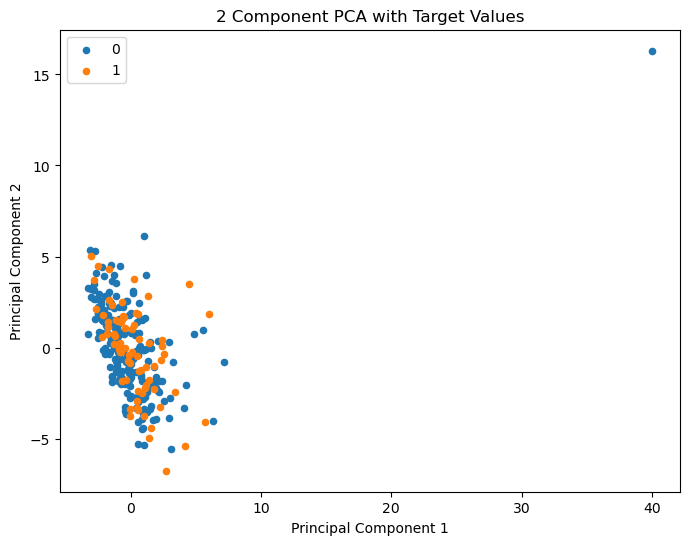

In [314]:
fig, ax = plt.subplots(figsize=(8, 6))
for target_value, group in PCA_df.groupby('target'):
    ax.scatter(group['PC1'], group['PC2'], label=target_value, s=20)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_title('2 Component PCA with Target Values')
ax.legend()

plt.show()

In [315]:
# numerical data columns
numerical_features = ['AGE'] + top50_mutation_genelist + ['mutation_num'] + top50_methyl_gene + ['GRADE_G2', 'GRADE_G3', 'GRADE_GX', 'OS_1', 'RACE_MOD_White']
X = meta_pheno_methy_dummy[numerical_features]

# normalization
X_scaled = StandardScaler().fit_transform(X)

# PCA 
pca = PCA(n_components=4)  # Choose the first 2 components
principalComponents = pca.fit_transform(X_scaled)

# PCA result to dataframe
PCA_df = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2', 'PC3', 'PC4'])
PCA_df['target'] = meta_pheno_methy_dummy['target']
pca.explained_variance_ratio_ 
# array([0.08353877, 0.06091522])
# 8% variance is on first componenet, 4% variance is on the second componenet

array([0.08353877, 0.06091522, 0.04514901, 0.03458478])

array([[<Axes: xlabel='PC1', ylabel='PC1'>,
        <Axes: xlabel='PC2', ylabel='PC1'>,
        <Axes: xlabel='PC3', ylabel='PC1'>,
        <Axes: xlabel='PC4', ylabel='PC1'>],
       [<Axes: xlabel='PC1', ylabel='PC2'>,
        <Axes: xlabel='PC2', ylabel='PC2'>,
        <Axes: xlabel='PC3', ylabel='PC2'>,
        <Axes: xlabel='PC4', ylabel='PC2'>],
       [<Axes: xlabel='PC1', ylabel='PC3'>,
        <Axes: xlabel='PC2', ylabel='PC3'>,
        <Axes: xlabel='PC3', ylabel='PC3'>,
        <Axes: xlabel='PC4', ylabel='PC3'>],
       [<Axes: xlabel='PC1', ylabel='PC4'>,
        <Axes: xlabel='PC2', ylabel='PC4'>,
        <Axes: xlabel='PC3', ylabel='PC4'>,
        <Axes: xlabel='PC4', ylabel='PC4'>]], dtype=object)

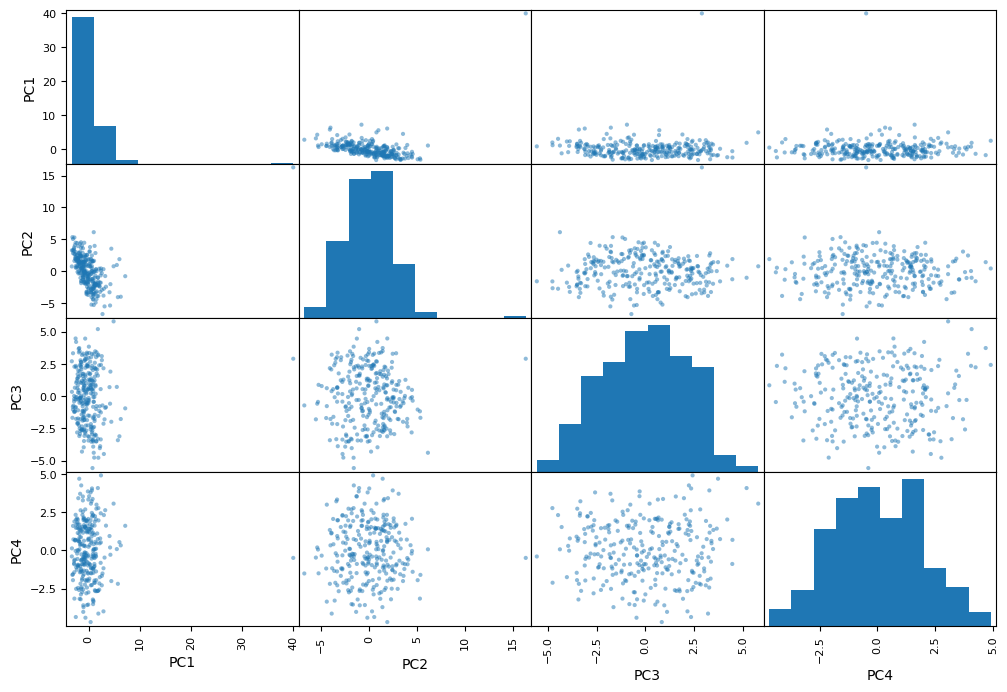

In [322]:
from pandas.plotting import scatter_matrix

scatter_matrix(PCA_df[['PC1', 'PC2', 'PC3', 'PC4']], figsize=(12, 8), alpha=0.5)

#### Summary of PCA

In total, three versions were tested (1) AGE + Mutation number + Mutation Frequency of top 50 genes; (2) Version 1 + Top50 CNV gene level ; (3) Version 2 + dummy variable of OS Status, RACE group and GRADE level.

However, it seems that (1) PC1 and PC2 cannot explain the variance; (2) target is not related or can not be separated by these two components

## Goal 1: Train a binary classifier to predict whether a patient will survive 5 years or not

### Version 1: Basic Logistic Regression Model

In [268]:
print(meta_pheno_methy_dummy.shape)
print(len(numerical_features))

(282, 116)
107


In [269]:
ML_origin_df = meta_pheno_methy_dummy[numerical_features + ['target']]
ML_origin_df.head()

,AGE,TP53,TTN,AHNAK2,MUC16,FLG2,XIST,DST,FLG,CSMD3,...,cg09037813,cg12880658,cg05488632,cg26521404,GRADE_G2,GRADE_G3,GRADE_GX,OS_1,RACE_MOD_White,target
0,78.0,1,1,1,0,1,0,0,0,0,...,0.957258,0.863958,0.860237,0.889689,0,1,0,1,1,0
1,85.0,1,0,0,0,0,0,0,0,0,...,0.964641,0.643738,0.847881,0.743712,0,1,0,0,1,0
2,72.0,1,1,1,0,0,0,0,1,0,...,0.418019,0.783895,0.102447,0.813615,0,1,0,1,1,0
3,59.0,1,0,0,0,0,0,0,0,0,...,0.698666,0.009076,0.024416,0.94715,0,1,0,1,1,0
4,50.0,1,0,0,0,0,0,0,1,0,...,0.476944,0.3363,0.807751,0.915447,0,1,0,0,1,1


In [285]:
from sklearn.model_selection import train_test_split

X = ML_origin_df.drop('target', axis=1)  # input feature
y = ML_origin_df['target']  # load target


# Split dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#########################
# Normalization
#########################
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = np.array(X_train_scaled)
X_test_scaled = np.array(X_test_scaled)

#########################
# Fit
#########################
from sklearn.linear_model import LogisticRegression

# did not convergen in the first time under default setting, thus, changing to max_iter=1000
clf = LogisticRegression(random_state=42, max_iter=10000)
clf.fit(X_train_scaled, y_train)

#########################
# Predict
#########################

from sklearn.metrics import accuracy_score, classification_report

y_pred = clf.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


# Accuracy: 0.6491228070175439
#               precision    recall  f1-score   support

#            0       0.79      0.71      0.75        42
#            1       0.37      0.47      0.41        15

#     accuracy                           0.65        57
#    macro avg       0.58      0.59      0.58        57
# weighted avg       0.68      0.65      0.66        57

# Overall accuracy is 0.65, weighted average f1-score is 0.66. F1-score for target=1 is low -> 0.41. 

Accuracy: 0.6491228070175439
              precision    recall  f1-score   support

           0       0.79      0.71      0.75        42
           1       0.37      0.47      0.41        15

    accuracy                           0.65        57
   macro avg       0.58      0.59      0.58        57
weighted avg       0.68      0.65      0.66        57



#### LASSO Regression for fewer features

In [286]:
#########################
# Fit
#########################
from sklearn.linear_model import LogisticRegression

# Using L1 regularization with 'saga' solver. 
clf = LogisticRegression(penalty='l1', solver='saga', random_state=42, max_iter=10000)
clf.fit(X_train_scaled, y_train)


#########################
# Predict
#########################

from sklearn.metrics import accuracy_score, classification_report

y_pred = clf.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


# Accuracy: 0.6666666666666666
#               precision    recall  f1-score   support

#            0       0.78      0.76      0.77        42
#            1       0.38      0.40      0.39        15

#     accuracy                           0.67        57
#    macro avg       0.58      0.58      0.58        57
# weighted avg       0.67      0.67      0.67        57

# Overall accuracy is 0.667, weighted average f1-score is 0.67. F1-score for target=1 is low -> 0.39. 
# 1% better than before

Accuracy: 0.6666666666666666
              precision    recall  f1-score   support

           0       0.78      0.76      0.77        42
           1       0.38      0.40      0.39        15

    accuracy                           0.67        57
   macro avg       0.58      0.58      0.58        57
weighted avg       0.67      0.67      0.67        57



#### SelectKbest method

In [287]:
#########################
# Feature Selection using SelectKBest
#########################
from sklearn.feature_selection import SelectKBest, f_classif  # f_classif is used for classification tasks

# Let's select the top 20 features for this example. You can adjust the number as per your requirement.
selector = SelectKBest(score_func=f_classif, k=20)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

#########################
# Fit with the selected features
#########################
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42, max_iter=10000)
clf.fit(X_train_selected, y_train)

#########################
# Predict with the selected features
#########################

from sklearn.metrics import accuracy_score, classification_report

y_pred = clf.predict(X_test_selected)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Accuracy: 0.7017543859649122
#               precision    recall  f1-score   support

#            0       0.76      0.88      0.81        42
#            1       0.38      0.20      0.26        15

#     accuracy                           0.70        57
#    macro avg       0.57      0.54      0.54        57
# weighted avg       0.66      0.70      0.67        57

# Accuracy is better than before. But f1-score for target is still weak

Accuracy: 0.7017543859649122
              precision    recall  f1-score   support

           0       0.76      0.88      0.81        42
           1       0.38      0.20      0.26        15

    accuracy                           0.70        57
   macro avg       0.57      0.54      0.54        57
weighted avg       0.66      0.70      0.67        57



#### RFE for removing non-informatic features

In [288]:
#########################
# Feature Selection using RFE
#########################
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Create the model with which RFE will be applied
model = LogisticRegression(random_state=42, max_iter=10000)

# Select top 20 features with RFE
rfe = RFE(estimator=model, n_features_to_select=20)
X_train_selected = rfe.fit_transform(X_train_scaled, y_train)
X_test_selected = rfe.transform(X_test_scaled)

#########################
# Fit with the selected features
#########################
clf = LogisticRegression(random_state=42, max_iter=10000)
clf.fit(X_train_selected, y_train)

#########################
# Predict with the selected features
#########################

from sklearn.metrics import accuracy_score, classification_report

y_pred = clf.predict(X_test_selected)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Accuracy: 0.6491228070175439
#               precision    recall  f1-score   support

#            0       0.76      0.76      0.76        42
#            1       0.33      0.33      0.33        15

#     accuracy                           0.65        57
#    macro avg       0.55      0.55      0.55        57
# weighted avg       0.65      0.65      0.65        57

# Accuracy is better than before. But f1-score for target is still weak

Accuracy: 0.6491228070175439
              precision    recall  f1-score   support

           0       0.76      0.76      0.76        42
           1       0.33      0.33      0.33        15

    accuracy                           0.65        57
   macro avg       0.55      0.55      0.55        57
weighted avg       0.65      0.65      0.65        57



#### Logistic Regression Summary

In summary, logistic regression was test for predicting whether an individual patient can have an `OS.MONTHS > 48` (did not chose 60 months due to insufficient data).

Default logistic regression without feature selection (default-model) , feature selection based on Lasso , sekectKbase, RFE were tried to see if it is possible to have a better performance

The result was shown as below

| Model | Default | Lasso | SelectKbase | RFE | 
|  ---  |  -----  | ----- | ----------- | --- | 
| Accuracy | 0.649 | 0.667 | 0.701 | 0.649 | 
| F1-score for target == 1 | 0.41 | 0.39 |  0.26 | 0.33 | 
| Weighted f1-score | 0.66 | 0.67 | 0.67 | 0.65 | 

Analysis:
- The weighted average f1-score of these 4 models were similar to each other. 
- Though the accuracy of `SelectKbase` model is the highest, it also has the lowest f1-score for class `target == 1`. This could lead to a high number of false negatives.
- Given the balance between accuracy and f1-score for the positive class, the default model without feature selection might be the most balanced model, although the improvements are marginal.


### Decision Tree Model

In [289]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a decision tree classifier instance
clf_tree = DecisionTreeClassifier(random_state=42)

# Fit the model
clf_tree.fit(X_train_scaled, y_train)

# Predict
y_pred_tree = clf_tree.predict(X_test_scaled)

# Print the results
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))

# Overall Accuracy : 0.684
# Weighted avg : 0.69
# f1-score for target == 1: 0.47 
# Looks better than before


Decision Tree Accuracy: 0.6842105263157895
              precision    recall  f1-score   support

           0       0.82      0.74      0.78        42
           1       0.42      0.53      0.47        15

    accuracy                           0.68        57
   macro avg       0.62      0.64      0.62        57
weighted avg       0.71      0.68      0.69        57



#### Cross-Validation for selecting hyperparameters including 'max_depth', 'min_sample_split', 'min_samples_leaf'

In [294]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Stratified split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp) # 0.25 x 0.8 = 0.2

# Normalization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Decision tree model for cross-validation
model = DecisionTreeClassifier(random_state=42)
scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Mean Cross-Validation Score:", scores.mean())

# Hyperparameter tuning for decision tree using GridSearchCV
param_grid = {
    'max_depth': [5, 10, 15, 20, None],  # Including None for unbounded depth
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_scaled, y_train)
best_model = grid_search.best_estimator_

# Predict on validation set to check performance
y_val_pred = best_model.predict(X_val_scaled)
print("Validation Set Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

# Once you are satisfied with the validation performance, evaluate on the test set
y_test_pred = best_model.predict(X_test_scaled)
print("Test Set Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))


Mean Cross-Validation Score: 0.6258467023172906
Validation Set Accuracy: 0.631578947368421
              precision    recall  f1-score   support

           0       0.72      0.84      0.77        43
           1       0.00      0.00      0.00        14

    accuracy                           0.63        57
   macro avg       0.36      0.42      0.39        57
weighted avg       0.54      0.63      0.58        57

Test Set Accuracy: 0.6491228070175439
              precision    recall  f1-score   support

           0       0.73      0.83      0.78        42
           1       0.22      0.13      0.17        15

    accuracy                           0.65        57
   macro avg       0.48      0.48      0.47        57
weighted avg       0.60      0.65      0.62        57



In [296]:
print(best_model)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=2, random_state=42)


#### Summary for Decision Tree Model

From the default model to k-fold cross-valdiation for selecting an optimal model containing the specified three parameters 'max_depth' , 'min_samples_split' , 'min_samples_leaf' 

Though the default decision tree model generates a better result than previous logistic regression models in terms of higher accuracy, higher weighted average f1-score and better f1-score for target-1 prediction. It became worse when using K-fold cross-validation even trying many different parameters.

This results indicates the limitation is on the amount of samples. 

## Goal 2: Train a regression algorithm to see if it is possible to predict the survival of an individual

Features: clinical data, ethnicity, gender, stage of the cancer, mutations

In [300]:
ML_Goal2_df = ML_origin_df.drop(columns=['target'])
ML_Goal2_df = ML_Goal2_df.rename(columns={'OS_1': 'target'})
ML_Goal2_df.head()

,AGE,TP53,TTN,AHNAK2,MUC16,FLG2,XIST,DST,FLG,CSMD3,...,cg00202711,cg09037813,cg12880658,cg05488632,cg26521404,GRADE_G2,GRADE_G3,GRADE_GX,target,RACE_MOD_White
0,78.0,1,1,1,0,1,0,0,0,0,...,0.350175,0.957258,0.863958,0.860237,0.889689,0,1,0,1,1
1,85.0,1,0,0,0,0,0,0,0,0,...,0.090675,0.964641,0.643738,0.847881,0.743712,0,1,0,0,1
2,72.0,1,1,1,0,0,0,0,1,0,...,0.632114,0.418019,0.783895,0.102447,0.813615,0,1,0,1,1
3,59.0,1,0,0,0,0,0,0,0,0,...,0.921168,0.698666,0.009076,0.024416,0.94715,0,1,0,1,1
4,50.0,1,0,0,0,0,0,0,1,0,...,0.886614,0.476944,0.3363,0.807751,0.915447,0,1,0,0,1


In [303]:
ML_Goal2_df['target'].value_counts()

1    154
0    128
Name: target, dtype: int64

In [308]:
X = ML_Goal2_df.drop('target', axis=1)  # input feature
y = ML_Goal2_df['target']  # load target

In [309]:
from sklearn.model_selection import train_test_split

# Split dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#########################
# Normalization
#########################
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = np.array(X_train_scaled)
X_test_scaled = np.array(X_test_scaled)

#########################
# Fit
#########################
from sklearn.linear_model import LogisticRegression

# did not convergen in the first time under default setting, thus, changing to max_iter=1000
clf = LogisticRegression(random_state=42, max_iter=10000)
clf.fit(X_train_scaled, y_train)

#########################
# Predict
#########################

from sklearn.metrics import accuracy_score, classification_report

y_pred = clf.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.49122807017543857
              precision    recall  f1-score   support

           0       0.44      0.42      0.43        26
           1       0.53      0.55      0.54        31

    accuracy                           0.49        57
   macro avg       0.49      0.49      0.49        57
weighted avg       0.49      0.49      0.49        57



In [310]:
#########################
# Fit with LASSO
#########################
from sklearn.linear_model import LogisticRegression

# Using L1 regularization with 'saga' solver. 
clf = LogisticRegression(penalty='l1', solver='saga', random_state=42, max_iter=10000)
clf.fit(X_train_scaled, y_train)


#########################
# Predict
#########################

from sklearn.metrics import accuracy_score, classification_report

y_pred = clf.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.5263157894736842
              precision    recall  f1-score   support

           0       0.48      0.42      0.45        26
           1       0.56      0.61      0.58        31

    accuracy                           0.53        57
   macro avg       0.52      0.52      0.52        57
weighted avg       0.52      0.53      0.52        57



In [311]:
#########################
# Feature Selection using SelectKBest
#########################
from sklearn.feature_selection import SelectKBest, f_classif  # f_classif is used for classification tasks

# Let's select the top 20 features for this example. You can adjust the number as per your requirement.
selector = SelectKBest(score_func=f_classif, k=20)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

#########################
# Fit with the selected features
#########################
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42, max_iter=10000)
clf.fit(X_train_selected, y_train)

#########################
# Predict with the selected features
#########################

from sklearn.metrics import accuracy_score, classification_report

y_pred = clf.predict(X_test_selected)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
#Accuracy: 0.5087719298245614
#              precision    recall  f1-score   support

#           0       0.43      0.23      0.30        26
#           1       0.53      0.74      0.62        31

#    accuracy                           0.51        57
#   macro avg       0.48      0.49      0.46        57
#weighted avg       0.49      0.51      0.47        57

Accuracy: 0.5087719298245614
              precision    recall  f1-score   support

           0       0.43      0.23      0.30        26
           1       0.53      0.74      0.62        31

    accuracy                           0.51        57
   macro avg       0.48      0.49      0.46        57
weighted avg       0.49      0.51      0.47        57



In [312]:
#########################
# Feature Selection using RFE
#########################
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Create the model with which RFE will be applied
model = LogisticRegression(random_state=42, max_iter=10000)

# Select top 20 features with RFE
rfe = RFE(estimator=model, n_features_to_select=20)
X_train_selected = rfe.fit_transform(X_train_scaled, y_train)
X_test_selected = rfe.transform(X_test_scaled)

#########################
# Fit with the selected features
#########################
clf = LogisticRegression(random_state=42, max_iter=10000)
clf.fit(X_train_selected, y_train)

#########################
# Predict with the selected features
#########################

from sklearn.metrics import accuracy_score, classification_report

y_pred = clf.predict(X_test_selected)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.5087719298245614
              precision    recall  f1-score   support

           0       0.45      0.35      0.39        26
           1       0.54      0.65      0.59        31

    accuracy                           0.51        57
   macro avg       0.50      0.50      0.49        57
weighted avg       0.50      0.51      0.50        57



#### Summary

Similarly, Basic logistic regression / Lasso Regression / SelectKBase / RFE were tested 

Accuracy of all these models are around 0.5 while the Lasso gave the best result (accuracy = 0.526). 

The weighted average f1-score are around 0.5, the best result sill came from lasso regression (f1-score = 0.52)
